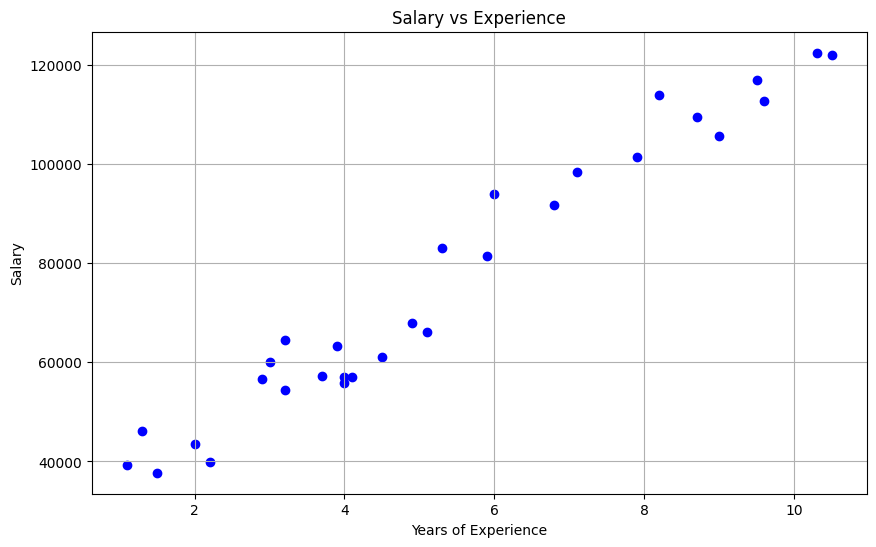


--- Lasso Regression (ADMM) ---
Mean Absolute Error:  3564.49
Root Mean Squared Error:  4641.9
R-squared:  0.97

--- Linear Regression ---
Mean Absolute Error:  3562.94
Root Mean Squared Error:  4643.2
R-squared:  0.97


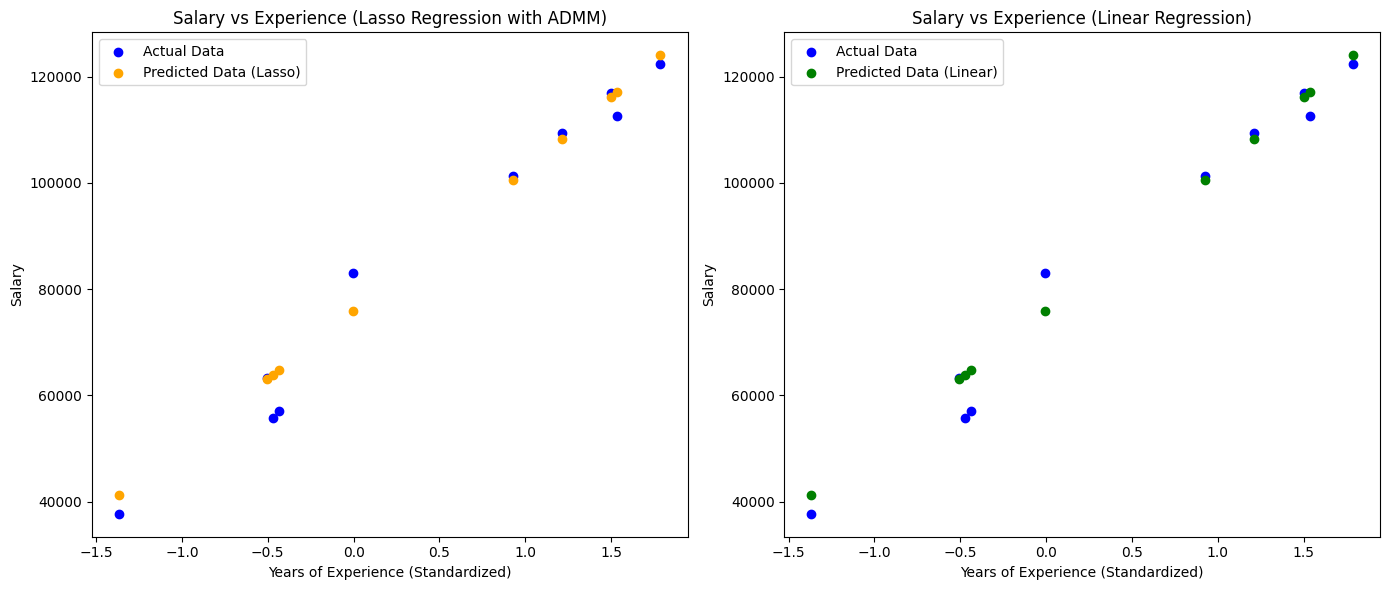

In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Lasso Regression using ADMM
class LassoRegressionADMM():
    def __init__(self, rho, alpha, iterations):
        self.rho = rho
        self.alpha = alpha
        self.iterations = iterations

    def fit(self, X, Y):
        self.m, self.n = X.shape
        self.W = np.zeros(self.n)
        self.b = 0
        self.Z = np.zeros(self.n)
        self.U = np.zeros(self.n)  # dual variable
        self.X = X
        self.Y = Y

        for i in range(self.iterations):
            self.W = self._update_weights()
            self.Z = self._update_z()
            self.U = self._update_dual_variable()

        return self

    def _update_weights(self):
        A = self.X.T.dot(self.X)
        b = self.X.T.dot(self.Y - self.b) + self.rho * (self.Z - self.U)
        return np.linalg.solve(A + self.rho * np.eye(self.n), b)

    def _update_z(self):
        return np.sign(self.W + self.U) * np.maximum(np.abs(self.W + self.U) - self.alpha / self.rho, 0)

    def _update_dual_variable(self):
        return self.U + self.W - self.Z

    def predict(self, X):
        return X.dot(self.W) + self.b

def visualize_salary_data(df):
    plt.figure(figsize=(10, 6))
    plt.scatter(df['YearsExperience'], df['Salary'], color='blue')
    plt.title('Salary vs Experience')
    plt.xlabel('Years of Experience')
    plt.ylabel('Salary')
    plt.grid(True)
    plt.show()

def linear_regression(X_train, Y_train, X_test, Y_test):
    linear_model = LinearRegression()
    linear_model.fit(X_train, Y_train)
    Y_pred_linear = linear_model.predict(X_test)
    mae_linear = np.mean(np.abs(Y_test - Y_pred_linear))
    rmse_final_linear = np.sqrt(np.mean((Y_test - Y_pred_linear) ** 2))
    r_squared_linear = linear_model.score(X_test, Y_test)

    print("\n--- Linear Regression ---")
    print("Mean Absolute Error: ", round(mae_linear, 2))
    print("Root Mean Squared Error: ", round(rmse_final_linear, 2))
    print("R-squared: ", round(r_squared_linear, 2))

    return Y_pred_linear

def main():
    df = pd.read_csv("Salary_Data.csv")
    visualize_salary_data(df)

    X = df.iloc[:, :-1].values
    Y = df.iloc[:, -1].values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X)

    X_train, X_test, Y_train, Y_test = train_test_split(
        X_poly, Y, test_size=1/3, random_state=0)

    best_alpha = 0.1
    best_rmse = float('inf')

    for alpha in [0.1, 1, 5, 10, 50, 100]:
        model = LassoRegressionADMM(rho=1.0, alpha=alpha, iterations=1000)
        model.fit(X_train, Y_train)
        Y_pred = model.predict(X_test)
        rmse = np.sqrt(np.mean((Y_test - Y_pred) ** 2))

        if rmse < best_rmse:
            best_rmse = rmse
            best_alpha = alpha

    model = LassoRegressionADMM(rho=1.0, alpha=best_alpha, iterations=1000)
    model.fit(X_train, Y_train)
    Y_pred_final = model.predict(X_test)

    mae_lasso = np.mean(np.abs(Y_test - Y_pred_final))
    rmse_final_lasso = np.sqrt(np.mean((Y_test - Y_pred_final) ** 2))
    r_squared_lasso = 1 - (np.sum((Y_test - Y_pred_final) ** 2) / np.sum((Y_test - np.mean(Y_test)) ** 2))

    print("\n--- Lasso Regression (ADMM) ---")
    print("Mean Absolute Error: ", round(mae_lasso, 2))
    print("Root Mean Squared Error: ", round(rmse_final_lasso, 2))
    print("R-squared: ", round(r_squared_lasso, 2))

    Y_pred_linear = linear_regression(X_train, Y_train, X_test, Y_test)

    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.scatter(X_test[:, 1], Y_test, color='blue', label='Actual Data')
    plt.scatter(X_test[:, 1], Y_pred_final, color='orange', label='Predicted Data (Lasso)')
    plt.title('Salary vs Experience (Lasso Regression with ADMM)')
    plt.xlabel('Years of Experience (Standardized)')
    plt.ylabel('Salary')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.scatter(X_test[:, 1], Y_test, color='blue', label='Actual Data')
    plt.scatter(X_test[:, 1], Y_pred_linear, color='green', label='Predicted Data (Linear)')
    plt.title('Salary vs Experience (Linear Regression)')
    plt.xlabel('Years of Experience (Standardized)')
    plt.ylabel('Salary')
    plt.legend()

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


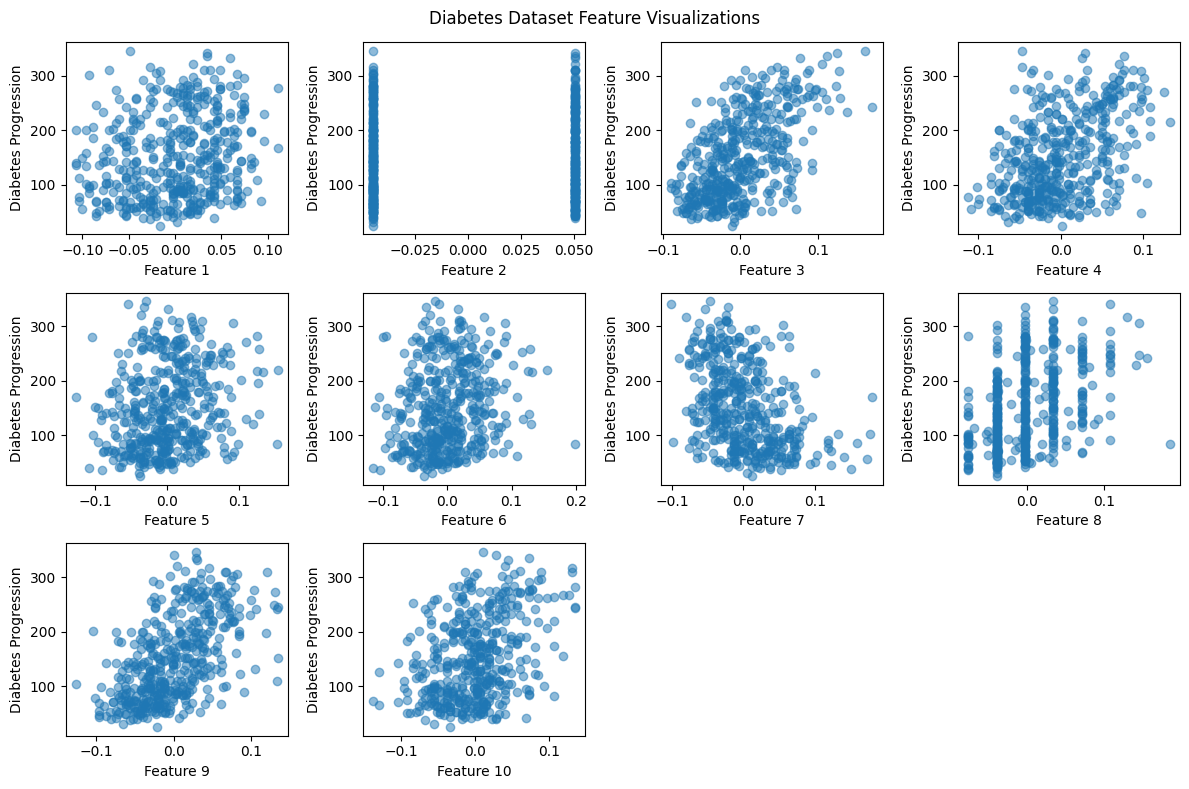


--- Lasso Regression (ADMM) ---
Mean Absolute Error:  46.8
Root Mean Squared Error:  59.03
R-squared:  0.32

--- Linear Regression ---
Mean Absolute Error:  49.99
Root Mean Squared Error:  62.86
R-squared:  0.23


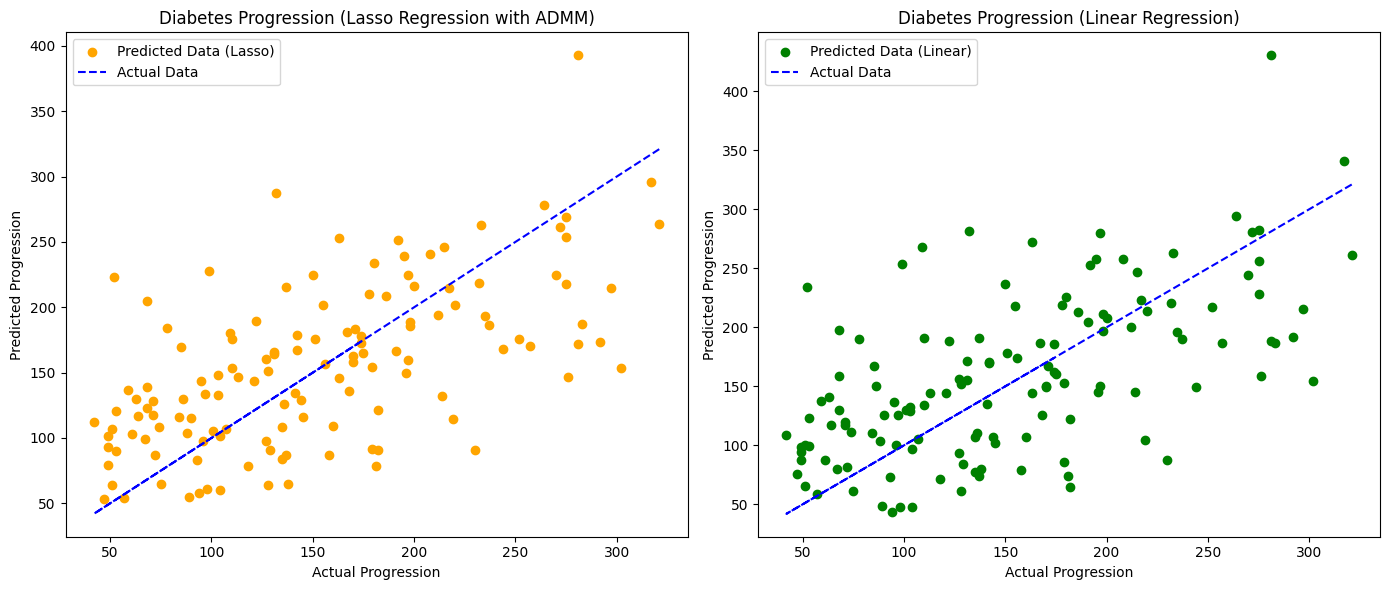


--- Important Features in Lasso Regression ---
Feature indices selected by Lasso regression: [0, 2, 3, 4, 5, 7, 9, 10, 11, 12, 14, 16, 17, 18, 19, 20, 22, 23, 26, 28, 30, 31, 32, 35, 36, 37, 38, 40, 41, 42, 43, 44, 48, 49, 52, 54, 55, 56, 58, 59, 61, 63, 65]


In [13]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

class LassoRegressionADMM():
    def __init__(self, rho, alpha, iterations):
        self.rho = rho
        self.alpha = alpha
        self.iterations = iterations

    def fit(self, X, Y):
        self.m, self.n = X.shape
        self.W = np.zeros(self.n)
        self.b = 0
        self.Z = np.zeros(self.n)
        self.U = np.zeros(self.n)  # dual variable
        self.X = X
        self.Y = Y

        for i in range(self.iterations):
            self.W = self._update_weights()
            self.Z = self._update_z()
            self.U = self._update_dual_variable()

        return self

    def _update_weights(self):
        A = self.X.T.dot(self.X)
        b = self.X.T.dot(self.Y - self.b) + self.rho * (self.Z - self.U)
        return np.linalg.solve(A + self.rho * np.eye(self.n), b)

    def _update_z(self):
        return np.sign(self.W + self.U) * np.maximum(np.abs(self.W + self.U) - self.alpha / self.rho, 0)

    def _update_dual_variable(self):
        return self.U + self.W - self.Z

    def predict(self, X):
        return X.dot(self.W) + self.b

def visualize_diabetes_data(X, Y):
    plt.figure(figsize=(12, 8))
    feature_names = ['Feature ' + str(i + 1) for i in range(X.shape[1])]
    for i in range(X.shape[1]):
        plt.subplot(3, 4, i + 1)  # Adjust for 10 features
        plt.scatter(X[:, i], Y, alpha=0.5)
        plt.xlabel(feature_names[i])
        plt.ylabel('Diabetes Progression')
    plt.suptitle('Diabetes Dataset Feature Visualizations')
    plt.tight_layout()
    plt.show()

def print_important_features(model, threshold=0.1):
    coefficients = model.W  # Coefficients learned by the Lasso model
    important_features = [i for i in range(len(coefficients)) if abs(coefficients[i]) > threshold]

    print("\n--- Important Features in Lasso Regression ---")
    print("Feature indices selected by Lasso regression:", important_features)

def linear_regression(X_train, Y_train, X_test, Y_test):
    linear_model = LinearRegression()
    linear_model.fit(X_train, Y_train)
    Y_pred_linear = linear_model.predict(X_test)
    mae_linear = np.mean(np.abs(Y_test - Y_pred_linear))
    rmse_final_linear = np.sqrt(np.mean((Y_test - Y_pred_linear) ** 2))
    r_squared_linear = linear_model.score(X_test, Y_test)

    print("\n--- Linear Regression ---")
    print("Mean Absolute Error: ", round(mae_linear, 2))
    print("Root Mean Squared Error: ", round(rmse_final_linear, 2))
    print("R-squared: ", round(r_squared_linear, 2))

    return Y_pred_linear

def main():
    diabetes = load_diabetes()
    X, Y = diabetes.data, diabetes.target

    # Visualize all features
    visualize_diabetes_data(X, Y)

    # Standardize features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Generate polynomial features
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X)

    # Splitting dataset into train and test set
    X_train, X_test, Y_train, Y_test = train_test_split(X_poly, Y, test_size=0.3, random_state=0)

    best_alpha = 0.1
    best_rmse = float('inf')

    # Hyperparameter tuning for alpha for Lasso
    for alpha in [0.1, 1, 5, 10, 50, 100]:
        model = LassoRegressionADMM(rho=1.0, alpha=alpha, iterations=1000)
        model.fit(X_train, Y_train)
        Y_pred = model.predict(X_test)
        rmse = np.sqrt(np.mean((Y_test - Y_pred) ** 2))

        # Update the best alpha if current rmse is lower
        if rmse < best_rmse:
            best_rmse = rmse
            best_alpha = alpha

    # Final model training with the best alpha for Lasso
    model = LassoRegressionADMM(rho=1.0, alpha=best_alpha, iterations=1000)
    model.fit(X_train, Y_train)
    Y_pred_final = model.predict(X_test)

    # Evaluation metrics for Lasso
    mae_lasso = np.mean(np.abs(Y_test - Y_pred_final))
    rmse_final_lasso = np.sqrt(np.mean((Y_test - Y_pred_final) ** 2))
    r_squared_lasso = 1 - (np.sum((Y_test - Y_pred_final) ** 2) / np.sum((Y_test - np.mean(Y_test)) ** 2))

    print("\n--- Lasso Regression (ADMM) ---")
    print("Mean Absolute Error: ", round(mae_lasso, 2))
    print("Root Mean Squared Error: ", round(rmse_final_lasso, 2))
    print("R-squared: ", round(r_squared_lasso, 2))

    # Call the linear regression function
    Y_pred_linear = linear_regression(X_train, Y_train, X_test, Y_test)

    # Visualization for predictions
    plt.figure(figsize=(14, 6))
    
    # Lasso Regression Plot
    plt.subplot(1, 2, 1)
    plt.scatter(Y_test, Y_pred_final, color='orange', label='Predicted Data (Lasso)')
    plt.plot(Y_test, Y_test, color='blue', linestyle='--', label='Actual Data')
    plt.title('Diabetes Progression (Lasso Regression with ADMM)')
    plt.xlabel('Actual Progression')
    plt.ylabel('Predicted Progression')
    plt.legend()

    # Linear Regression Plot
    plt.subplot(1, 2, 2)
    plt.scatter(Y_test, Y_pred_linear, color='green', label='Predicted Data (Linear)')
    plt.plot(Y_test, Y_test, color='blue', linestyle='--', label='Actual Data')
    plt.title('Diabetes Progression (Linear Regression)')
    plt.xlabel('Actual Progression')
    plt.ylabel('Predicted Progression')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Print important features based on Lasso regression coefficients
    print_important_features(model)

if __name__ == "__main__":
    main()
